In [1]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
cdc_nur = pd.read_csv('CSV/board-exam-results - CDC-Nursing.csv')

In [3]:
cdc_nur['Year'] = cdc_nur['Time Date'].apply(lambda x: str(x)[-4:])
cdc_nur['Month'] = cdc_nur['Time Date'].apply(lambda x: str(x)[-6:-4])
cdc_nur['Day'] = cdc_nur['Time Date'].apply(lambda x: str(x)[:-6])
cdc_nur['ds'] = pd.DatetimeIndex(cdc_nur['Year']+'-'+cdc_nur['Month']+'-'+cdc_nur['Day'])

In [4]:
cdc_nur.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
cdc_nur.columns = ['y', 'ds']

In [5]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
cdc_nur_model = m.fit(cdc_nur)

22:07:27 - cmdstanpy - INFO - Chain [1] start processing
22:07:27 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 6, 10), datetime(2023, 12, 10), datetime(2024, 6, 10), datetime(2024, 12, 10), datetime(2025, 6, 10), datetime(2025, 12, 10), datetime(2026, 6, 10), datetime(2026, 12, 10), datetime(2027, 6, 10), datetime(2027, 12, 10), datetime(2028, 6, 10), datetime(2028, 12, 10), datetime(2029, 6, 10), datetime(2029, 12, 10), datetime(2030, 6, 10), datetime(2030, 12, 10)]

# Create a dataframe with those specific dates
cdc_nur_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
cdc_nur_forecast = m.predict(cdc_nur_future)
cdc_nur_forecast['yhat'] = cdc_nur_forecast['yhat'].clip(lower=0, upper=100).round()

In [7]:
cdc_nur_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-06-10,94.0
1,2023-12-10,39.0
2,2024-06-10,57.0
3,2024-12-10,35.0
4,2025-06-10,63.0
5,2025-12-10,32.0
6,2026-06-10,70.0
7,2026-12-10,28.0
8,2027-06-10,79.0
9,2027-12-10,24.0


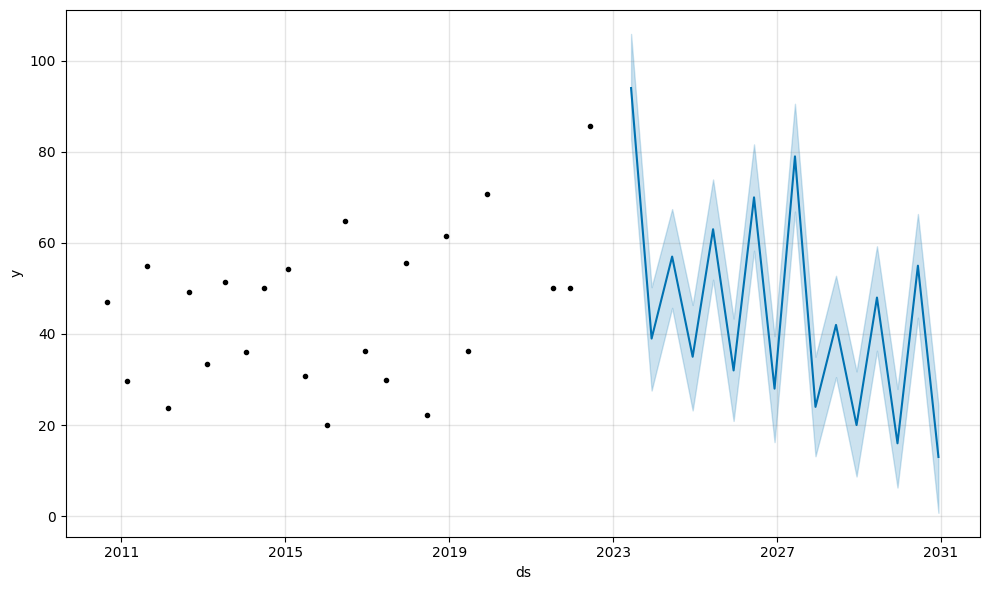

In [8]:
cdc_nur_plot = m.plot(cdc_nur_forecast)

In [9]:
letran_nur = pd.read_csv('CSV/board-exam-results - LETRAN-Nursing.csv')

In [10]:
letran_nur['Year'] = letran_nur['Time Date'].apply(lambda x: str(x)[-4:])
letran_nur['Month'] = letran_nur['Time Date'].apply(lambda x: str(x)[-6:-4])
letran_nur['Day'] = letran_nur['Time Date'].apply(lambda x: str(x)[:-6])
letran_nur['ds'] = pd.DatetimeIndex(letran_nur['Year']+'-'+letran_nur['Month']+'-'+letran_nur['Day'])

In [11]:
letran_nur.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
letran_nur.columns = ['y', 'ds']

In [12]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
letran_nur_model = m.fit(letran_nur)

22:12:26 - cmdstanpy - INFO - Chain [1] start processing
22:12:27 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 6, 10), datetime(2023, 12, 10), datetime(2024, 6, 10), datetime(2024, 12, 10), datetime(2025, 6, 10), datetime(2025, 12, 10), datetime(2026, 6, 10), datetime(2026, 12, 10), datetime(2027, 6, 10), datetime(2027, 12, 10), datetime(2028, 6, 10), datetime(2028, 12, 10), datetime(2029, 6, 10), datetime(2029, 12, 10), datetime(2030, 6, 10), datetime(2030, 12, 10)]

# Create a dataframe with those specific dates
letran_nur_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
letran_nur_forecast = m.predict(letran_nur_future)
letran_nur_forecast['yhat'] = letran_nur_forecast['yhat'].clip(lower=0, upper=100).round()

In [14]:
letran_nur_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-06-10,100.0
1,2023-12-10,61.0
2,2024-06-10,64.0
3,2024-12-10,48.0
4,2025-06-10,72.0
5,2025-12-10,46.0
6,2026-06-10,80.0
7,2026-12-10,44.0
8,2027-06-10,88.0
9,2027-12-10,41.0


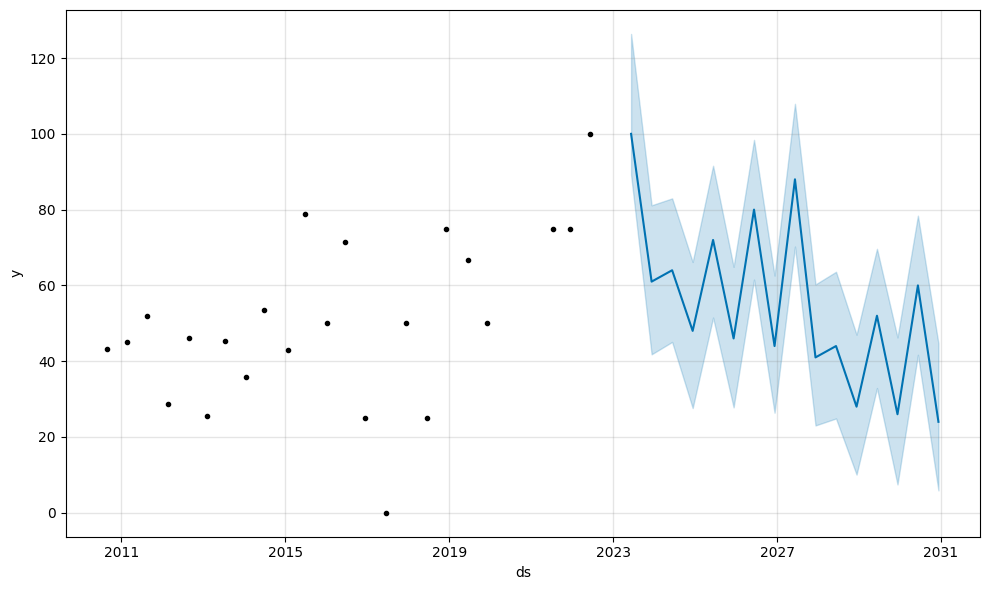

In [15]:
letran_nur_plot = m.plot(letran_nur_forecast)

In [23]:
lpu_nur = pd.read_csv('CSV/board-exam-results - LPU - Nursing.csv')

lpu_nur['Year'] = lpu_nur['Time Date'].apply(lambda x: str(x)[-4:])
lpu_nur['Month'] = lpu_nur['Time Date'].apply(lambda x: str(x)[-6:-4])
lpu_nur['Day'] = lpu_nur['Time Date'].apply(lambda x: str(x)[:-6])
lpu_nur['ds'] = pd.DatetimeIndex(lpu_nur['Year']+'-'+lpu_nur['Month']+'-'+lpu_nur['Day'])

lpu_nur.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
lpu_nur.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
lpu_nur_model = m.fit(lpu_nur)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 6, 10), datetime(2023, 12, 10), datetime(2024, 6, 10), datetime(2024, 12, 10), datetime(2025, 6, 10), datetime(2025, 12, 10), datetime(2026, 6, 10), datetime(2026, 12, 10), datetime(2027, 6, 10), datetime(2027, 12, 10), datetime(2028, 6, 10), datetime(2028, 12, 10), datetime(2029, 6, 10), datetime(2029, 12, 10), datetime(2030, 6, 10), datetime(2030, 12, 10)]

# Create a dataframe with those specific dates
lpu_nur_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
lpu_nur_forecast = m.predict(lpu_nur_future)
lpu_nur_forecast['yhat'] = lpu_nur_forecast['yhat'].clip(lower=0, upper=100).round()

22:30:04 - cmdstanpy - INFO - Chain [1] start processing
22:30:05 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
lpu_nur_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-06-10,55.0
1,2023-12-10,0.0
2,2024-06-10,24.0
3,2024-12-10,0.0
4,2025-06-10,23.0
5,2025-12-10,0.0
6,2026-06-10,23.0
7,2026-12-10,0.0
8,2027-06-10,23.0
9,2027-12-10,0.0


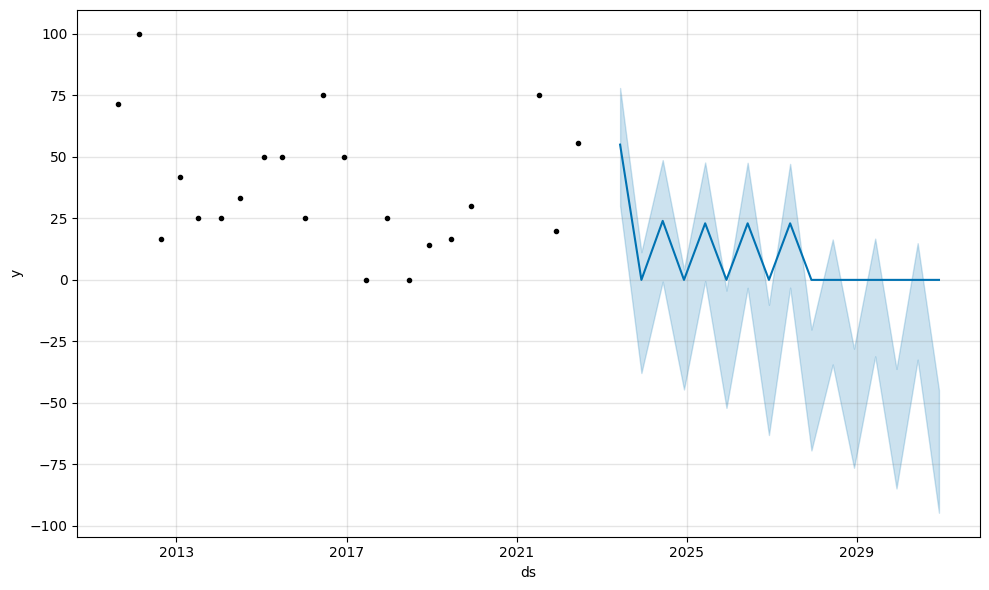

In [25]:
lpu_nur_plot = m.plot(lpu_nur_forecast)

In [31]:
sjp_nur = pd.read_csv('CSV/board-exam-results - SJP-Nursing.csv')

sjp_nur['Year'] = sjp_nur['Time Date'].apply(lambda x: str(x)[-4:])
sjp_nur['Month'] = sjp_nur['Time Date'].apply(lambda x: str(x)[-6:-4])
sjp_nur['Day'] = sjp_nur['Time Date'].apply(lambda x: str(x)[:-6])
sjp_nur['ds'] = pd.DatetimeIndex(sjp_nur['Year']+'-'+sjp_nur['Month']+'-'+sjp_nur['Day'])

sjp_nur.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
sjp_nur.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
sjp_nur_model = m.fit(sjp_nur)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 6, 10), datetime(2023, 12, 10), datetime(2024, 6, 10), datetime(2024, 12, 10), datetime(2025, 6, 10), datetime(2025, 12, 10), datetime(2026, 6, 10), datetime(2026, 12, 10), datetime(2027, 6, 10), datetime(2027, 12, 10), datetime(2028, 6, 10), datetime(2028, 12, 10), datetime(2029, 6, 10), datetime(2029, 12, 10), datetime(2030, 6, 10), datetime(2030, 12, 10)]

# Create a dataframe with those specific dates
sjp_nur_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
sjp_nur_forecast = m.predict(sjp_nur_future)
sjp_nur_forecast['yhat'] = sjp_nur_forecast['yhat'].clip(lower=0, upper=100).round()

22:41:51 - cmdstanpy - INFO - Chain [1] start processing
22:41:51 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
sjp_nur_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-06-10,92.0
1,2023-12-10,35.0
2,2024-06-10,48.0
3,2024-12-10,37.0
4,2025-06-10,55.0
5,2025-12-10,30.0
6,2026-06-10,63.0
7,2026-12-10,23.0
8,2027-06-10,72.0
9,2027-12-10,15.0


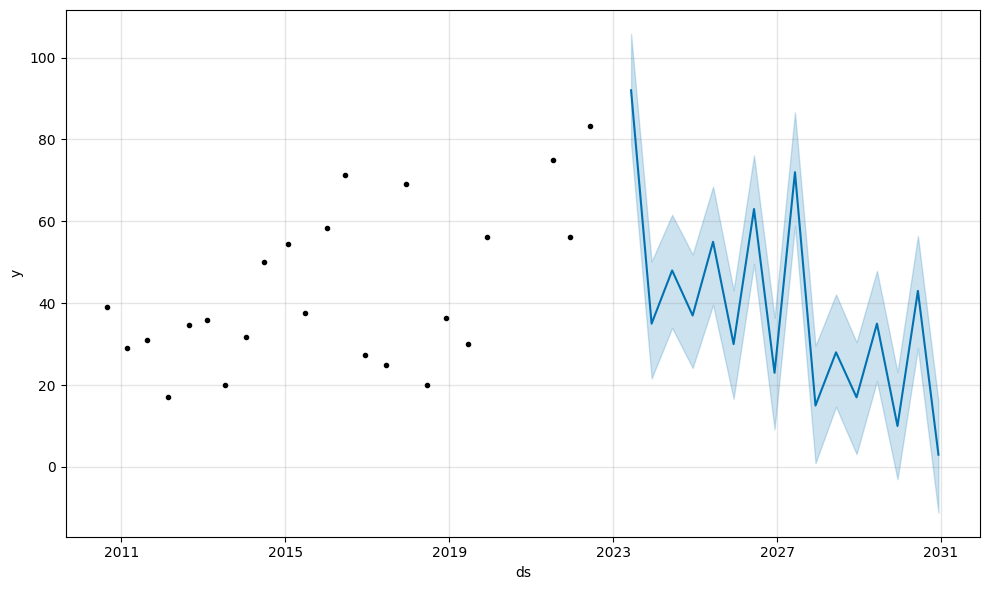

In [33]:
sjp_nur_plot = m.plot(sjp_nur_forecast)

In [35]:
perps_nur = pd.read_csv('CSV/board-exam-results - PERP-Nursing.csv')

perps_nur['Year'] = perps_nur['Time Date'].apply(lambda x: str(x)[-4:])
perps_nur['Month'] = perps_nur['Time Date'].apply(lambda x: str(x)[-6:-4])
perps_nur['Day'] = perps_nur['Time Date'].apply(lambda x: str(x)[:-6])
perps_nur['ds'] = pd.DatetimeIndex(perps_nur['Year']+'-'+perps_nur['Month']+'-'+perps_nur['Day'])

perps_nur.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
perps_nur.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
perps_nur_model = m.fit(perps_nur)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 6, 10), datetime(2023, 12, 10), datetime(2024, 6, 10), datetime(2024, 12, 10), datetime(2025, 6, 10), datetime(2025, 12, 10), datetime(2026, 6, 10), datetime(2026, 12, 10), datetime(2027, 6, 10), datetime(2027, 12, 10), datetime(2028, 6, 10), datetime(2028, 12, 10), datetime(2029, 6, 10), datetime(2029, 12, 10), datetime(2030, 6, 10), datetime(2030, 12, 10)]

# Create a dataframe with those specific dates
perps_nur_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
perps_nur_forecast = m.predict(perps_nur_future)
perps_nur_forecast['yhat'] = perps_nur_forecast['yhat'].clip(lower=0, upper=100).round()

22:48:12 - cmdstanpy - INFO - Chain [1] start processing
22:48:12 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
perps_nur_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-06-10,82.0
1,2023-12-10,43.0
2,2024-06-10,71.0
3,2024-12-10,53.0
4,2025-06-10,78.0
5,2025-12-10,53.0
6,2026-06-10,84.0
7,2026-12-10,53.0
8,2027-06-10,92.0
9,2027-12-10,53.0


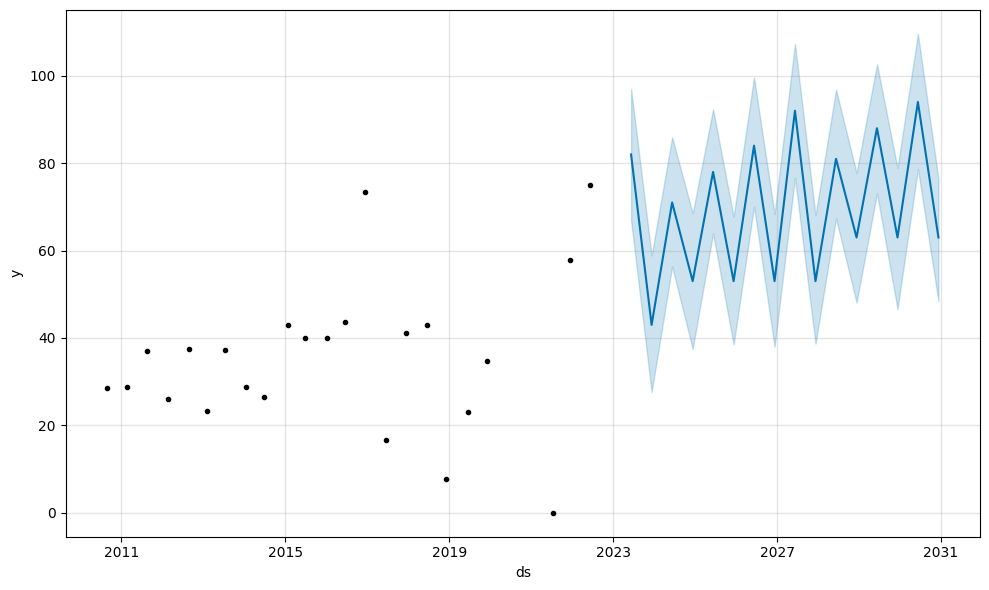

In [38]:
perps_nur_plot = m.plot(perps_nur_forecast)